In [85]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
test_idx=[0]
with open('train.csv') as csvfile:
	data = pd.read_csv(csvfile,delimiter=',')
	
	y = data['price_range']
	del data['price_range']
	X = data
	X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
	#4.svm

In [86]:
param_grid = [
 {'C': [.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2], 'kernel': ['linear']},
 {'C': [.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [87]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
clf=svm.SVC()
print("running")
clfd = GridSearchCV(clf,param_grid,cv = 5, n_jobs = -1)
clfd.fit(X_train,y_train)
predict4 = clfd.predict(X_test)
print("SVM Classifier ",accuracy_score(y_test,predict4)*100)
print( clfd.best_estimator_ )
print( clfd.best_score_ )
print( clfd.best_params_ )

running
SVM Classifier  96.6666666667
SVC(C=1.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9757142857142858
{'C': 1.4, 'kernel': 'linear'}


In [89]:
	with open('test.csv') as Testdata:
			Test_data = csv.reader(Testdata,delimiter=',')
			Test_Data = []
			for Row in Test_data :
				Test_Data.append(Row[1:])
			Test_Data = np.delete(Test_Data,test_idx,axis=0)
			#highest accuracy (svm classifier :: robust against outliers)
			from sklearn import svm
			my_classifier=svm.SVC(kernel='linear',C=1.3)
			my_classifier.fit(X_train,y_train)
			prediction=my_classifier.predict(Test_Data)
			Result=my_classifier.predict(Test_Data)
			test_idx=[0]
			#df = pd.DataFrame(Result)
			#df.to_csv("file_path.csv")
			with open('result.csv', "w") as f :
				writer = csv.writer(f)
				ps = ['id','price_range']
				writer.writerow(ps)
				x=1
				for row in Result:
					writer.writerow([x,row])
					x+=1

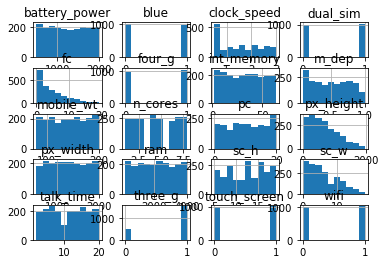

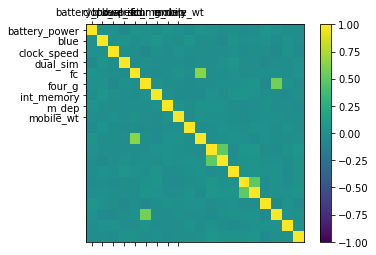

/home/harsha4148/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


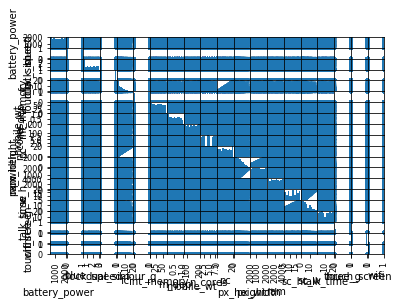

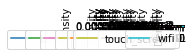

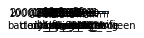

In [93]:
import matplotlib.pyplot as plt
data.hist()
plt.show()
correlations = data.corr()
# plot correlation matrix
names=data.columns.values
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data)
plt.show()
data.plot(kind='density', subplots=True, layout=(100,100), sharex=False)
plt.show()
data.plot(kind='box', subplots=True, layout=(100,100), sharex=False, sharey=False)
plt.show()
